## **BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 29***

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Pratik Patil, Suyash Patil, Sahil Somil, Rakul Chauhan

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS3111H, 2021A7PS2078H, 2021AAPS1582H, 2021AAPS1971H


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **Emissions of Carbon Dioxide**

---



### **Introduction:**

    
This project aims to analyse a dataset provided by the Canadian Government, detailing the amount of CO2 emissions from vehicles. Our focus lies in identifying the impact of different variables on CO2 emissions, examining the intricacies of how emissions vary when fuel consumption is considered separately. Through exploratory data analysis (EDA), feature selection, and the implementation of advanced machine learning models, our objective is to find insights that contribute to a good understanding of CO2 emission patterns.

We implemented the following models:

1.   K-Nearest Neighbors (KNN)
2.   Random Forest
3.   Artificial Neural Network (ANN)
4.   XGBoost
5.   CatBoost (Implemented from Research Paper)


***NOTE:***
*The first 4 models perform regression on CO2 emission values considering it as a continuous variable.*


# **_1. Preprocessing of Dataset_**

### Loading Dataset

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('Carbon Emissions.csv')

df.head(3)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


## 1. Exploratory Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### 1.1 Checking Null Values

In [18]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

### 1.2 Shape

In [19]:
df.shape

(7385, 12)

### 1.3 Renaming Columns

In [20]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [21]:
# Renaming columns names
renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_consumption_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_consumption_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_consumption_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_consumption_comb',
    'CO2 Emissions(g/km)': 'co2' }
df.rename(renamed_columns, axis='columns', inplace=True)

In [22]:
df.head(2)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,mpgfuel_consumption_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


### 1.4 Unique Values

In [23]:
def get_unique_values(df):

    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make,42,-,object
1,model,2053,-,object
2,vehicle_class,16,-,object
3,engine_size,51,-,float64
4,cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,transmission,27,-,object
6,fuel_type,5,"[Z, D, X, E, N]",object
7,fuel_consumption_city,211,-,float64
8,fuel_consumption_hwy,143,-,float64
9,fuel_consumption_comb,181,-,float64


### 1.5 Descriptive Statistics

In [24]:
ndf = df[['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'mpgfuel_consumption_comb', 'co2']]
ndf.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_consumption_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


### 1.6 Correlation Analysis

In [25]:
ndf.corr()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,mpgfuel_consumption_comb,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_consumption_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_consumption_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_consumption_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
mpgfuel_consumption_comb,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


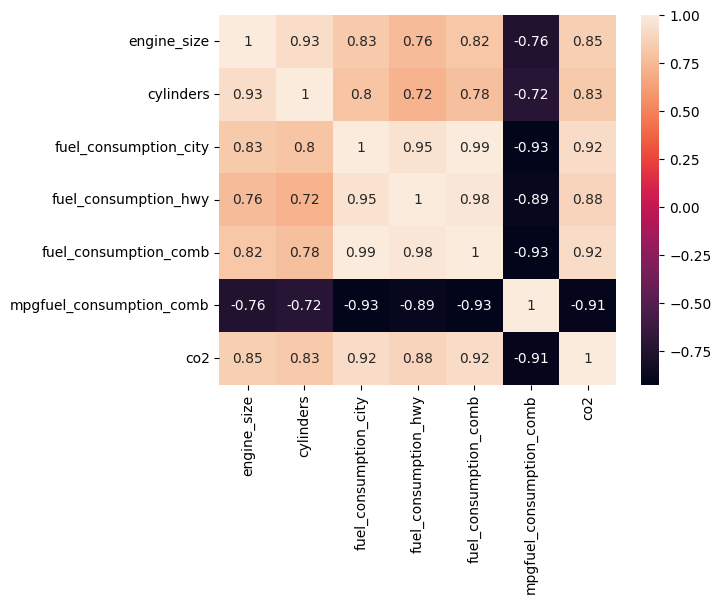

In [26]:
import seaborn as sns
sns.heatmap(ndf.corr(), annot = True);

### 1.7 Pair Plot

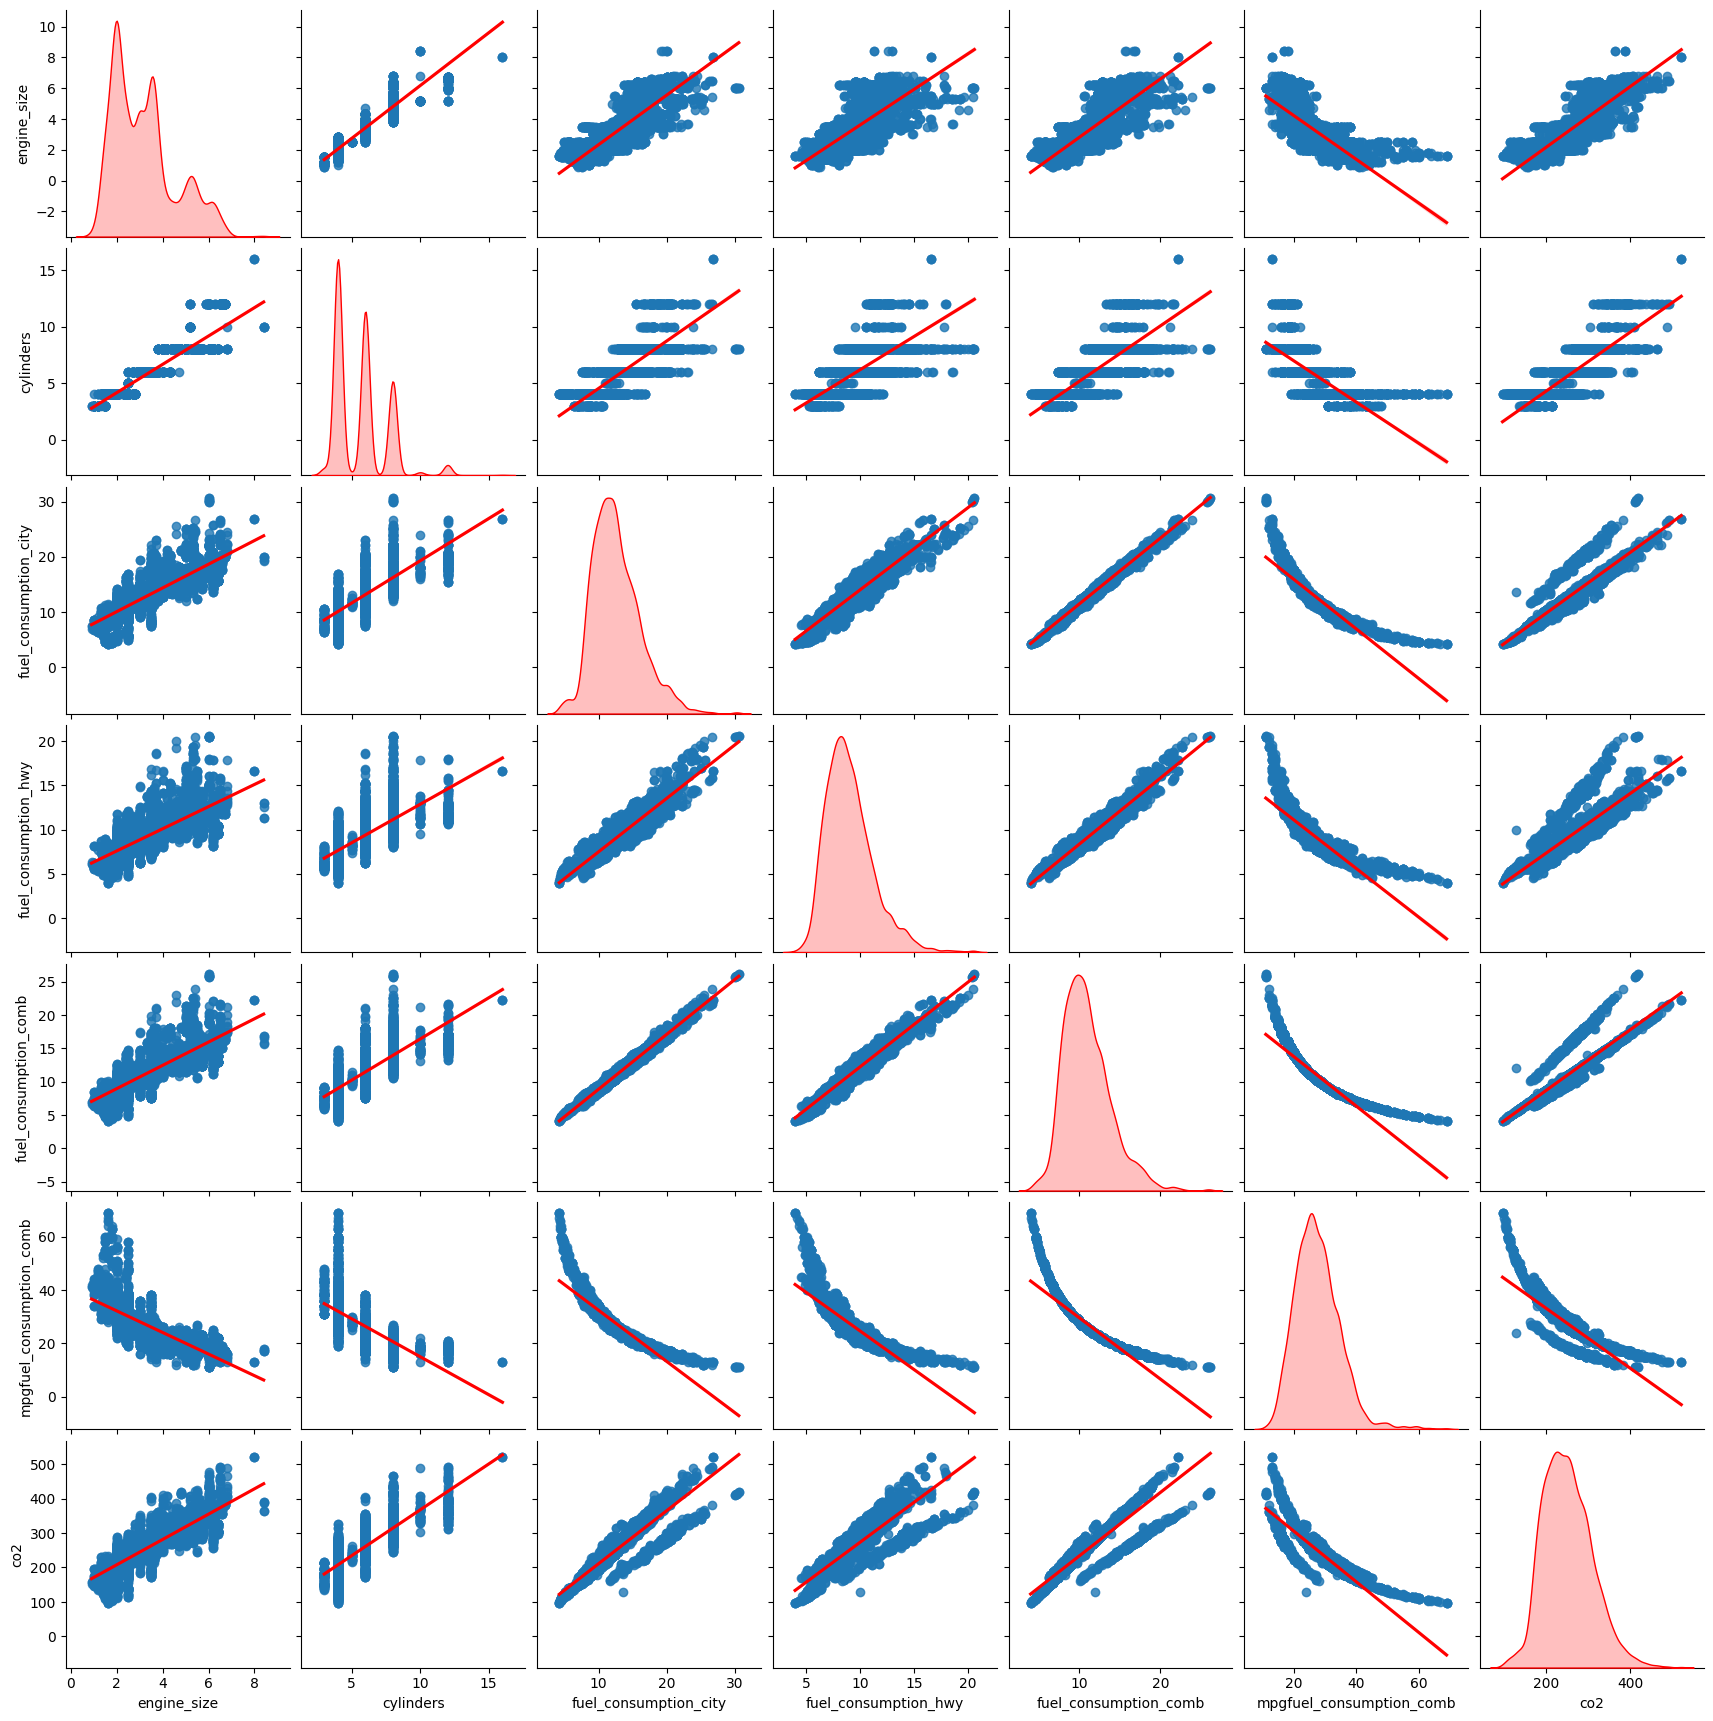

In [27]:
sns.pairplot(ndf, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

### 1.8 Outliers Check

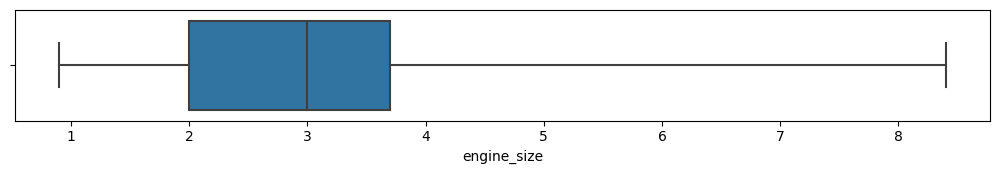

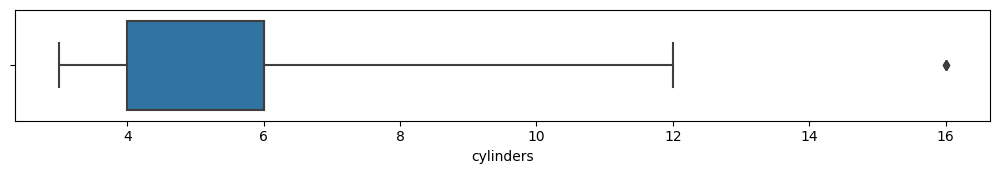

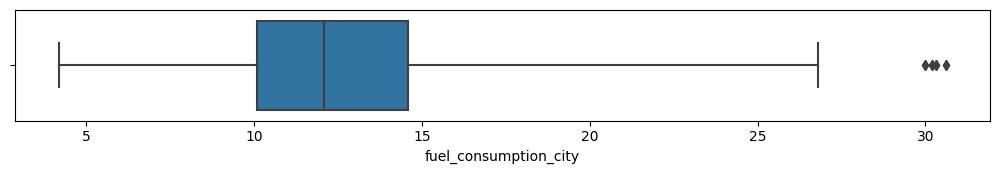

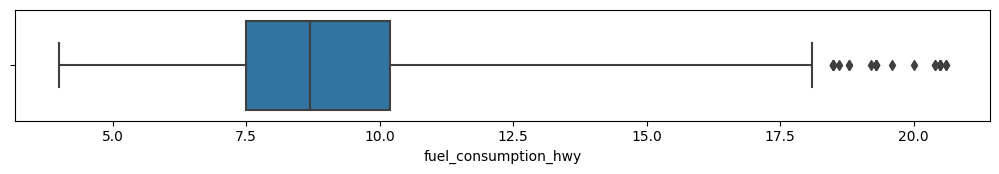

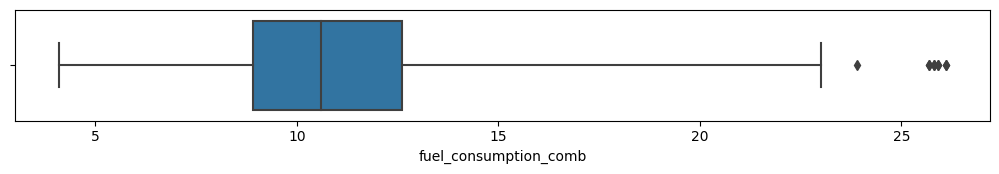

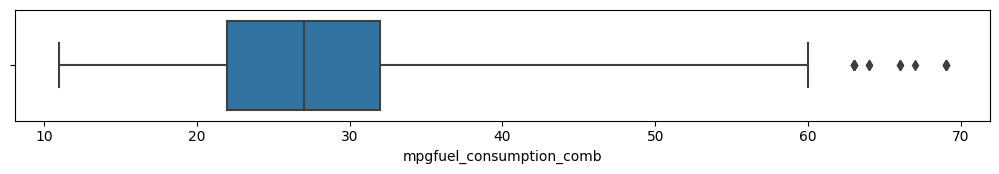

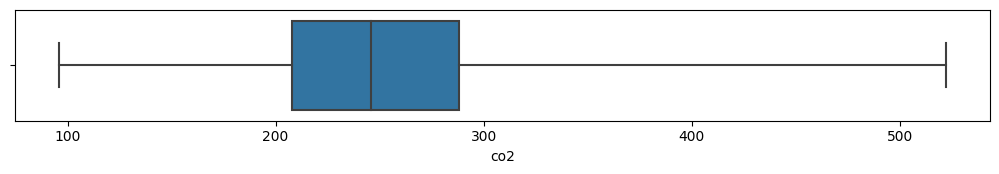

In [28]:
import matplotlib.pyplot as plt

index=0
for feature in ndf.columns:
    index += 1
    plt.figure(figsize=(20, 20))
    plt.subplot((len(df.columns)), 2, index)
    sns.boxplot(x=feature, data=df, whis=3)

    plt.tight_layout()

    plt.show()

### 1.9 Data Visulaisation

In [29]:
import plotly.graph_objects as go

for column in ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']:
    df_column = df[column].value_counts().reset_index().rename(columns={'index': column, column: 'Count'})[0:25]
    df_column = df_column.sort_values(by='Count', ascending=False)

    fig = go.Figure(go.Bar(x=df_column[column], y=df_column['Count'],
                           marker={'color': df_column['Count'], 'colorscale': 'Viridis'},
                           text=df_column['Count'], textposition="outside"))
    fig.update_layout(title_text=f'Top 25 {column}', xaxis_title=column, yaxis_title='Number of Vehicles',
                      title_x=0.5, width=700, height=500)
    fig.show()

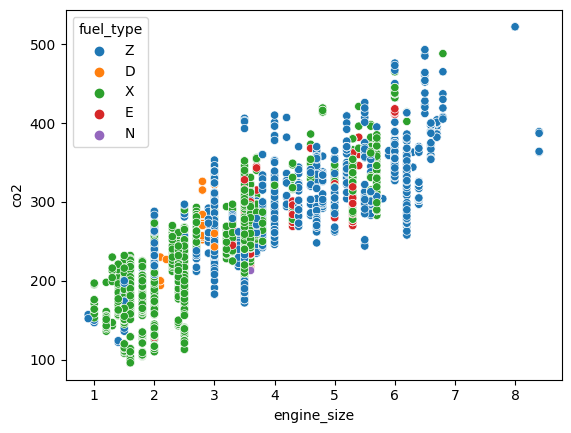

In [30]:
sns.scatterplot(x="engine_size", y="co2", data=df, hue="fuel_type");

### ***Feature Selection***
**Reasons for Inclusion:**

1. Engine Size (L):
 Larger engines tend to produce more emissions.

2. Cylinders:
  Vehicles with more cylinders often consume more fuel and generate higher CO2 emissions.

3. Fuel Consumption Comb (L/100 km):
 This metric is directly related to CO2 emissions, as higher fuel consumption generally corresponds to increased emissions.

4. Fuel Type:
Different fuel types have varying carbon footprints. For example, diesel and gasoline have different combustion characteristics, leading to variations in CO2 emissions.
*Also, we did One-Hot-Encoding to convert characters to integer values for easier calculations.*





**Reasons for exclusion:**

1. Vehicle Class: Its impact on emissions is indirect; selected features already capture more direct indicators, avoiding unnecessary complexity.

2. Transmission: Its impact on fuel efficiency is secondary to factors like engine size and fuel consumption, making its inclusion less impactful.

3. Fuel Consumption City/Hwy (L/100 km): These granular metrics may correlate with overall consumption, risking multicollinearity without significant performance improvement.

4. Fuel Consumption Comb (mpg): Redundant with the metric in liters per 100 kilometers, it adds no new information and introduces confusion due to mixed units.

5. 'Make' and 'Model': As identifiers, they may lead to overfitting without contributing substantially to model generalization, focusing on more impactful predictors for CO2 emissions.








### 1.10 Encoding Categorical Data

In [31]:
#  Encoding categorical variables Vehicle Class and Fuel Type
encoded_df = pd.get_dummies(df, columns=["fuel_type"])
print("Encoded dataframe shape:", encoded_df.shape)

# Defining target variable and features list
target_variable = "co2"
# NOTE: Here we donot incorporate mpgfuel_consumption_comb in input matrix because of its negative covariance with all other features and target variable
features = ['engine_size', 'cylinders', 'fuel_consumption_comb']
features += list(encoded_df.columns[encoded_df.columns.str.startswith("fuel_type_")])
print(features)

# Setting splitting ratio and getting the splitting index
split_ratio = 0.9
split_index = int(encoded_df.shape[0] * split_ratio)

# Splitting the data into training and testing sets (90% training, 10% testing)
X_train, X_test = encoded_df[features].values[:split_index], encoded_df[features].values[split_index:]
y_train, y_test = encoded_df[target_variable].values[:split_index], encoded_df[target_variable].values[split_index:]

# Printing shapes of tarin and test numpy arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Encoded dataframe shape: (7385, 16)
['engine_size', 'cylinders', 'fuel_consumption_comb', 'fuel_type_D', 'fuel_type_E', 'fuel_type_N', 'fuel_type_X', 'fuel_type_Z']
X_train shape: (6646, 8)
X_test shape: (739, 8)
y_train shape: (6646,)
y_test shape: (739,)


# ***2. ML Model 1 : KNN***

In [32]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        prediction = np.mean(k_nearest_labels)
        return prediction

if __name__ == "__main__":
    # Create and fit the KNN model
    k_value = 3
    knn_model = KNNRegressor(k=k_value)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Display the output format for the first 25 rows of the testing set
    print("{:<15} {:<15} {:<15}".format('Predicted', 'Actual', 'Difference'))
    print("="*45)
    for i in range(25):
        predicted = y_pred[i]
        actual = y_test[i]
        difference = predicted - actual
        print("{:<15.2f} {:<15.2f} {:<15.2f}".format(predicted, actual, difference))

    # Evaluate the model
    mse = np.mean((y_pred - y_test)**2)
    print(f"Mean Squared Error: {mse}")


Predicted       Actual          Difference     
196.33          199.00          -2.67          
251.33          250.00          1.33           
233.33          234.00          -0.67          
209.67          211.00          -1.33          
223.33          227.00          -3.67          
253.67          255.00          -1.33          
203.67          203.00          0.67           
230.33          232.00          -1.67          
211.33          213.00          -1.67          
230.00          238.00          -8.00          
230.33          234.00          -3.67          
230.00          238.00          -8.00          
209.67          209.00          0.67           
254.67          256.00          -1.33          
222.33          221.00          1.33           
267.00          268.00          -1.00          
265.33          263.00          2.33           
276.67          276.00          0.67           
258.00          259.00          -1.00          
323.33          324.00          -0.67   

# ***3. ML Model 2 : Random Forest Regression***







In [33]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        # Check termination conditions
        if depth == self.max_depth or len(unique_classes) == 1:
            return {'value': np.mean(y)}

        # Find the best split
        best_feature, best_threshold = self._find_best_split(X, y)

        if best_feature is None:
            return {'value': np.mean(y)}

        # Split the data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        # Recursively build the subtrees
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature_index': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def _find_best_split(self, X, y):
        num_samples, num_features = X.shape
        if num_samples <= 1:
            return None, None

        # Calculate the variance reduction for each feature and threshold
        variances = np.var(y)
        best_variance_reduction = 0
        best_feature = None
        best_threshold = None

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) > 0 and np.sum(right_mask) > 0:
                    left_variance = np.var(y[left_mask])
                    right_variance = np.var(y[right_mask])
                    weighted_variance = (np.sum(left_mask) / num_samples) * left_variance + \
                                        (np.sum(right_mask) / num_samples) * right_variance

                    variance_reduction = variances - weighted_variance

                    if variance_reduction > best_variance_reduction:
                        best_variance_reduction = variance_reduction
                        best_feature = feature_index
                        best_threshold = threshold

        return best_feature, best_threshold

    def predict_one(self, x, tree):
        if 'value' in tree:
            return tree['value']

        if x[tree['feature_index']] <= tree['threshold']:
            return self.predict_one(x, tree['left'])
        else:
            return self.predict_one(x, tree['right'])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])


class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Randomly select a subset of the data
            indices = np.random.choice(len(X), len(X), replace=True)
            X_subset, y_subset = X[indices], y[indices]

            # Train a decision tree on the subset
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_subset, y_subset)

            # Add the tree to the forest
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)


# Convert y_train and y_test to 1D arrays if they are not
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()

# Initialize and train the Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Print the predicted values, actual values, and differences for the first 25 rows
print("{:<15} {:<15} {:<15}".format("Predicted", "Actual", "Difference"))
print("="*45)
for i in range(25):
    predicted = y_pred[i]
    actual = y_test[i]
    difference = predicted - actual
    print("{:<15.2f} {:<15.2f} {:<15.2f}".format(predicted, actual, difference))

# Evaluate the performance
mse = np.mean((y_pred - y_test) ** 2)
print(f'Mean Squared Error: {mse}')


Predicted       Actual          Difference     
197.17          199.00          -1.83          
249.41          250.00          -0.59          
232.52          234.00          -1.48          
209.78          211.00          -1.22          
223.61          227.00          -3.39          
253.84          255.00          -1.16          
203.40          203.00          0.40           
229.86          232.00          -2.14          
211.35          213.00          -1.65          
237.27          238.00          -0.73          
232.45          234.00          -1.55          
237.27          238.00          -0.73          
209.78          209.00          0.78           
256.21          256.00          0.21           
222.22          221.00          1.22           
268.27          268.00          0.27           
263.64          263.00          0.64           
275.83          276.00          -0.17          
257.32          259.00          -1.68          
321.53          324.00          -2.47   

# ***4. ML Model 3A: ANN***

In [34]:
import numpy as np

# Define the tanh activation function and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

# Initialize the input, hidden, and output layer weights randomly
input_neurons = X_train.shape[1]
hidden_neurons1 = 8
hidden_neurons2 = 4
output_neurons = 1

np.random.seed(42)
weights_input_hidden1 = np.random.uniform(size=(input_neurons, hidden_neurons1))
weights_hidden1_hidden2 = np.random.uniform(size=(hidden_neurons1, hidden_neurons2))
weights_hidden2_output = np.random.uniform(size=(hidden_neurons2, output_neurons))

# Training the neural network
epochs = 1000
learning_rate = 0.0001

for epoch in range(epochs):
    # Forward propagation
    hidden_layer1_input = np.dot(X_train, weights_input_hidden1)
    hidden_layer1_output = tanh(hidden_layer1_input)

    hidden_layer2_input = np.dot(hidden_layer1_output, weights_hidden1_hidden2)
    hidden_layer2_output = tanh(hidden_layer2_input)

    output_layer_input = np.dot(hidden_layer2_output, weights_hidden2_output)
    predicted_output = output_layer_input

    # Calculate the error
    error = y_train.reshape(-1, 1) - predicted_output

    # Backpropagation
    # Output layer
    output_delta = error * tanh_derivative(predicted_output)

    # Hidden layer 2
    hidden_layer2_error = output_delta.dot(weights_hidden2_output.T)
    hidden_layer2_delta = hidden_layer2_error * tanh_derivative(hidden_layer2_input)

    # Hidden layer 1
    hidden_layer1_error = hidden_layer2_delta.dot(weights_hidden1_hidden2.T)
    hidden_layer1_delta = hidden_layer1_error * tanh_derivative(hidden_layer1_input)

    # Update the weights using gradient descent
    weights_hidden2_output += hidden_layer2_output.T.dot(output_delta) * learning_rate
    weights_hidden1_hidden2 += hidden_layer1_output.T.dot(hidden_layer2_delta) * learning_rate
    weights_input_hidden1 += X_train.T.dot(hidden_layer1_delta) * learning_rate


# Predictions on the test set
hidden_layer1_input = np.dot(X_test, weights_input_hidden1)
hidden_layer1_output = tanh(hidden_layer1_input)

hidden_layer2_input = np.dot(hidden_layer1_output, weights_hidden1_hidden2)
hidden_layer2_output = tanh(hidden_layer2_input)

output_layer_input = np.dot(hidden_layer2_output, weights_hidden2_output)
predicted_output = output_layer_input

# # Print the predictions, actual values, and the difference
result = np.concatenate((predicted_output[:25], y_test[:25].reshape(-1, 1), abs(predicted_output[:25] - y_test[:25].reshape(-1, 1))), axis=1)
print(result)


[[245.61060958 199.          46.61060958]
 [245.61079078 250.           4.38920922]
 [245.61139558 234.          11.61139558]
 [245.61020032 211.          34.61020032]
 [245.61044446 227.          18.61044446]
 [245.61163356 255.           9.38836644]
 [245.61006003 203.          42.61006003]
 [245.61077641 232.          13.61077641]
 [245.61024423 213.          32.61024423]
 [245.61085443 238.           7.61085443]
 [245.61080321 234.          11.61080321]
 [245.61085443 238.           7.61085443]
 [245.61020032 209.          36.61020032]
 [245.61144366 256.          10.38855634]
 [245.61040685 221.          24.61040685]
 [245.61147921 268.          22.38852079]
 [245.61146562 263.          17.38853438]
 [245.61149814 276.          30.38850186]
 [245.61163593 259.          13.38836407]
 [245.61167258 324.          78.38832742]
 [245.61169062 333.          87.38830938]
 [245.61015502 209.          36.61015502]
 [245.61048094 227.          18.61048094]
 [245.61051632 227.          18.61

In [35]:
error = (predicted_output - y_train) ** 2
error = np.mean(error)
print(error)

3419.5463026835296


# ***4. ML Model 3B: XGBoost***

In [36]:
import numpy as np

class SimpleGradientBoostingRegressor:
    def __init__(self, n_estimators=1000, learning_rate=0.001, max_depth=3):
        # Initialize the SimpleGradientBoostingRegressor with hyperparameters
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []     # List to store individual trees in the ensemble

    def fit(self, X, y):
        # Initialize predictions to the mean of the target variable
        self.base_prediction = np.mean(y)
        y_pred = np.full_like(y, self.base_prediction)

        for _ in range(self.n_estimators):
            # Compute the negative gradient (residuals)
            residuals = y - y_pred

            # Fit a decision tree to the negative gradient
            tree = self._fit_tree(X, residuals, depth=0)

            # Make predictions with the new tree
            tree_pred = self._predict_tree(tree, X)

            # Update the predictions with the weighted sum
            y_pred += self.learning_rate * tree_pred

            # Save the tree
            self.trees.append(tree)

    def _fit_tree(self, X, y, depth):
        if depth == self.max_depth or len(set(y)) == 1:
            return np.mean(y)

        # Find the best split
        feature_index, threshold = self._find_best_split(X, y)

        if feature_index is None:
            return np.mean(y)

        # Split the data
        mask = X[:, feature_index] <= threshold
        left_tree = self._fit_tree(X[mask], y[mask], depth + 1)
        right_tree = self._fit_tree(X[~mask], y[~mask], depth + 1)

        return (feature_index, threshold, left_tree, right_tree)

    def _find_best_split(self, X, y):
        # Find the best split point for a given feature
        best_feature_index = None
        best_threshold = None
        best_loss = float('inf')

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                mask = X[:, feature_index] <= threshold
                left_y = y[mask]
                right_y = y[~mask]

                if len(left_y) == 0 or len(right_y) == 0:
                    continue

                # Compute the mean squared error
                loss = self._compute_loss(left_y) + self._compute_loss(right_y)

                if loss < best_loss:
                    best_loss = loss
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def _compute_loss(self, y):
        # Compute the mean squared error
        return np.mean((y - np.mean(y)) ** 2)

    def _predict_tree(self, tree, X):
        # Recursive function to make predictions using a decision tree
        if isinstance(tree, (float, np.float64)):
            return tree

        feature_index, threshold, left_tree, right_tree = tree
        mask = X[:, feature_index] <= threshold
        predictions = np.empty(X.shape[0])

        predictions[mask] = self._predict_tree(left_tree, X[mask])
        predictions[~mask] = self._predict_tree(right_tree, X[~mask])

        return predictions

    def predict(self, X):
        # Initialize predictions to the mean of the target variable
        y_pred = np.full(X.shape[0], self.base_prediction)

        # Make predictions with each tree
        for tree in self.trees:
            tree_pred = self._predict_tree(tree, X)
            y_pred += self.learning_rate * tree_pred

        return y_pred

# Convert data into float64 type NumPy arrays
X_train, X_test = np.array(X_train).astype(float), np.array(X_test).astype(float)
y_train, y_test = np.array(y_train).astype(float), np.array(y_test).astype(float)

# Initialize and train the model
gb_model = SimpleGradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Display the predicted values, actual values, and differences for the first 25 rows
output = np.column_stack((y_pred[:25], y_test[:25], y_pred[:25] - y_test[:25]))
print("Predicted | Actual | Difference")
print(output)

# Evaluate the model
mse = np.mean((y_pred - y_test) ** 2)
print(f'Mean Squared Error on Test Set: {mse}')


Predicted | Actual | Difference
[[229.21879017 199.          30.21879017]
 [261.93994079 250.          11.93994079]
 [253.46480599 234.          19.46480599]
 [234.99670997 211.          23.99670997]
 [247.04662178 227.          20.04662178]
 [261.93994079 255.           6.93994079]
 [232.26107673 203.          29.26107673]
 [253.46480599 232.          21.46480599]
 [234.99670997 213.          21.99670997]
 [256.06007903 238.          18.06007903]
 [253.46480599 234.          19.46480599]
 [256.06007903 238.          18.06007903]
 [234.99670997 209.          25.99670997]
 [261.93994079 256.           5.93994079]
 [247.04662178 221.          26.04662178]
 [261.93994079 268.          -6.06005921]
 [261.93994079 263.          -1.06005921]
 [267.71089818 276.          -8.28910182]
 [261.93994079 259.           2.93994079]
 [267.71089818 324.         -56.28910182]
 [267.71089818 333.         -65.28910182]
 [234.99670997 209.          25.99670997]
 [247.04662178 227.          20.04662178]
 [

# ***5. ML Model 4 (Based on research literature)***

In [40]:
'''
    For all above models, we had considered the target variable(CO2 emission) as a continuous value and predicted accordingly.
    However, for the below model CatBoost, we classify the target variable into 3 classes:
        1. Low <160 in grams per kilometer
        2. Medium >160 and <255 in grams per kilometer
        3. High >255 in grams per kilometer
    as per govenment standards and classify the CO2 emissions into these categories.
    Link to research paper: https://www.sciencedirect.com/science/article/pii/S0160412021006024
'''

# Redifining X_train, X_test, y_train, y_test for CatBoost
target_variable = "co2"

# Defining target variable and features list
features = ['engine_size', 'cylinders', 'fuel_type', 'fuel_consumption_comb']

# Setting splitting ratio and getting the splitting index
split_ratio = 0.9
split_index = int(df.shape[0] * split_ratio)

# Splitting the data into training and testing sets (90% training, 10% testing)
X_train_cb, X_test_cb = df[features].values[:split_index], df[features].values[split_index:]
y_train_cb, y_test_cb = df[target_variable].values[:split_index], df[target_variable].values[split_index:]

In [41]:
# Counting number of examples in each category of CO2 emissions
# Define the ranges
range_1 = (float('-inf'), 160)  # Low range <160 in grams per kilometer
range_2 = (160, 255)            # Medium range >160 and <255 in grams per kilometer
range_3 = (255, float('inf'))   # High range >255 in grams per kilometer

# Count the values in each range for y_train_cb
count_range1_train = np.sum(np.logical_and(y_train_cb > range_1[0], y_train_cb <= range_1[1]))
count_range2_train = np.sum(np.logical_and(y_train_cb > range_2[0], y_train_cb <= range_2[1]))
count_range3_train = np.sum(np.logical_and(y_train_cb > range_3[0], y_train_cb <= range_3[1]))

# Count the values in each range for y_test_cb
count_range1_test = np.sum(np.logical_and(y_test_cb > range_1[0], y_test_cb <= range_1[1]))
count_range2_test = np.sum(np.logical_and(y_test_cb > range_2[0], y_test_cb <= range_2[1]))
count_range3_test = np.sum(np.logical_and(y_test_cb > range_3[0], y_test_cb <= range_3[1]))

# Print the counts
print("Counts in y_train_cb:")
print(f"Range Low: {count_range1_train}")
print(f"Range Medium: {count_range2_train}")
print(f"Range High: {count_range3_train}")

print("\nCounts in y_test:")
print(f"Range Low: {count_range1_test}")
print(f"Range Medium: {count_range2_test}")
print(f"Range High: {count_range3_test}")

# Create a function to map values to the specified ranges
def map_to_ranges(y, ranges):
    result = np.zeros_like(y, dtype=int)
    for i, r in enumerate(ranges):
        result[(y > r[0]) & (y <= r[1])] = i
    return result

# Map values in y_train_cb and y_test to the specified ranges
y_train_cb = map_to_ranges(y_train_cb, [range_1, range_2, range_3])
y_test_cb = map_to_ranges(y_test_cb, [range_1, range_2, range_3])

Counts in y_train_cb:
Range Low: 190
Range Medium: 3592
Range High: 2864

Counts in y_test:
Range Low: 33
Range Medium: 367
Range High: 339


In [42]:
import numpy as np
import warnings

class CatBoost:
    def __init__(self, learning_rate = 0.1, depth = 6, iterations = 50):
        # Initialize CatBoost model with specified hyperparameters
        self.learning_rate = learning_rate
        self.depth = depth
        self.iterations = iterations
        self.trees = []  # List to store individual trees in the ensemble

    def sigmoid(self, x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-x))

    def log_loss_gradient(self, y_true, y_pred):
        # Calculate gradient of log loss
        return y_pred - y_true

    def train(self, X_train_cb, y_train_cb):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            # Train the CatBoost model
            for iteration in range(self.iterations):
                # Computing residuals for the current iteration
                residuals = y_train_cb - self.predict(X_train_cb)

                # Build a decision tree and add it to the ensemble
                tree = self.build_tree(X_train_cb, residuals)
                self.trees.append(tree)

    def build_tree(self, X, residuals, depth=0):
        # Recursive function to build a decision tree
        if depth == self.depth:
            # If maximum depth is reached, return the mean of residuals
            return np.mean(residuals)

        # Finding the best split for the current node
        split_feature, split_value = self.find_best_split(X, residuals)

        # Creating masks for left and right branches
        left_mask = X[:, split_feature] <= split_value
        right_mask = ~left_mask

        # Recursively build left and right subtrees
        left_tree = self.build_tree(X[left_mask], residuals[left_mask], depth + 1)
        right_tree = self.build_tree(X[right_mask], residuals[right_mask], depth + 1)

        # Return a tuple representing the current node
        return (split_feature, split_value, left_tree, right_tree)

    def find_best_split(self, X, residuals):
        # Find the best split point for a given feature
        best_feature = 0
        best_value = 0
        best_loss = float('inf')

        # Iterate over features
        for feature in range(X.shape[1]):
            # Get unique values for the current feature
            unique_values = np.unique(X[:, feature])

            # Iterate over unique values to find the best split
            for value in unique_values:
                # Creating masks for left and right branches based on the current split
                left_mask = X[:, feature] <= value
                right_mask = ~left_mask

                # Calculating the loss for the left and right branches
                left_residuals = residuals[left_mask]
                right_residuals = residuals[right_mask]
                left_loss = np.sum(self.log_loss_gradient(left_residuals, np.mean(left_residuals)))
                right_loss = np.sum(self.log_loss_gradient(right_residuals, np.mean(right_residuals)))

                # Calculating total loss for the current split
                total_loss = left_loss + right_loss

                # Updating best split if the current split has lower loss
                if total_loss < best_loss:
                    best_loss = total_loss
                    best_feature = feature
                    best_value = value

        # Return the best feature and split value
        return best_feature, best_value

    def predict_tree(self, tree, X):
        # Recursive function to make predictions using a decision tree
        if isinstance(tree, tuple):
            # If the current node is a tuple, it represents a split
            feature, value, left_tree, right_tree = tree
            mask = X[:, feature] <= value
            return np.where(mask, self.predict_tree(left_tree, X), self.predict_tree(right_tree, X))
        else:
            # If the current node is not a tuple, it represents a leaf node, return the value
            return tree

    def predict(self, X):
        # Making predictions using the entire ensemble of trees
        predictions = np.zeros(X.shape[0])

        # Aggregating predictions from individual trees
        for tree in self.trees:
            predictions += self.learning_rate * self.predict_tree(tree, X)

        # Applying sigmoid activation to the aggregated predictions
        return self.sigmoid(predictions)

# Creating and train the CatBoost model
catboost_model = CatBoost(learning_rate=0.1, depth=6, iterations=50)
catboost_model.train(X_train_cb, y_train_cb)

# Making predictions on the test set
y_pred_cb = catboost_model.predict(X_test_cb)

# Evaluating the model
threshold_low = 0.8     # threshold for low
threshold_medium = 0.94 # threshold for high

y_pred_category = np.zeros_like(y_pred_cb, dtype=int)

y_pred_category[y_pred_cb[:] < threshold_low] = 0  # low
y_pred_category[(y_pred_cb[:] > threshold_low) & (y_pred_cb[:] <= threshold_medium)] = 1  # medium
y_pred_category[y_pred_cb[:] > threshold_medium] = 2  # high

# Calculating accuracy
accuracy = np.mean(y_pred_category == y_test_cb)
print(f"Accuracy: {accuracy * 100} %")


Accuracy: 87.41542625169147 %


# ***6. Comparison of insights drawn from the models***

After applying KNN , Random Forest, ANN and XGBoost, the total mean squared error(MSE) of testing dataset for KNN and Random Forest were much low indicating that they are perfectly catching the patterns in the dataset to predict the amount of C02. On the other hand, for ANN and XGBoost, the total MSE were quite high indicating they are unable to catch the patterns perfectly from the dataset.
This suggests the need to have more complex models of ANN and XGBoost.

**Some ways to improving the models performance could be:**
1. **Data Augmentation:** One can consider augmenting the dataset to introduce variations and increase the diversity of the training data, so that the models are able to capture a broader range of patterns.
2. **Optimize Hyperparameters:** Fine-tuning the hyperparameters of ANN and XGBoost to better suit the dataset. Adjusting parameters such as learning rates, tree depth, and layer architectures can enhance the models' ability to capture intricate patterns.
3. **Regularization Techniques:** Applying regularization techniques to prevent overfitting in ANN. Techniques such as dropout in neural networks can enhance generalization capabilities.

After implementing CatBoost and referring to research papers, we achieved an impressive accuracy of 87.41% for a 90%:10% train-test split. This indicates that CatBoost has shown promising results in predicting CO2 emissions.

**Advantages of using CatBoost:**

1. **Categorical Feature Support:** CatBoost inherently handles categorical features well, eliminating the need for extensive preprocessing of such features. This can be advantageous when dealing with datasets that contain categorical variables related to CO2 emissions.

2. **Robust to Overfitting:** CatBoost is designed to be robust to overfitting, which is a common concern in machine learning models. Its internal mechanisms, such as the implementation of ordered boosting and the use of random permutations during training, contribute to its ability to generalize well to unseen data.

**Some ways to improving the CatBoost's performance could be:**
1. **Ensemble Techniques:** Considering ensemble techniques, such as combining CatBoost with other models or tweaking its internal parameters, might provide a boost in predictive accuracy. Ensemble methods often lead to more robust and accurate models.



In conclusion, these machine learning models discussed above are a good way to predict CO2 emissions but they require improvement and adjustment to practical scenarios. Using these ML models, we can predict the CO2 emissions in grams per kilometer and classify the car model as low, medium or high emissions using thresholds and thus determine whether it is safe for environment or not.


---


# **_7. References_**

1.   CatBoost Research Paper: https://www.sciencedirect.com/science/article/pii/S0160412021006024

2.   Data for thresholds: https://www.ageco.co.uk/useful-articles/car/what-are-the-co2-emissions-of-my-car/#:~:text=The%20CO2%20emissions%20of%20a,255g%2Fkm%20is%20considered%20high

3. KNN: https://www.ibm.com/topics/knn#:~:text=Resources-,Next%20steps,of%20an%20individual%20data%20point.

4. Random Forest: https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems.

5. ANN: https://www.javatpoint.com/artificial-neural-network

6. XGBoost: https://www.geeksforgeeks.org/xgboost/

7. CatBoost1: https://www.youtube.com/watch?v=KXOTSkPL2X4&pp=ygUIY2F0Ym9vc3Q%3D

8. CatBoost2: https://www.youtube.com/watch?v=3Bg2XRFOTzg&pp=ygUIY2F0Ym9vc3Q%3D

